In [1]:
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import numpy as np  # type: ignore

In [2]:
df = pd.read_csv('./../processed_data/filtered_data_with_classes.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder  # type: ignore
from sklearn.model_selection import train_test_split  # type: ignore
from sklearn.metrics import accuracy_score  # type: ignore

In [6]:
# Encoding categorical variables (if 'condition_text' is categorical)
label_encoder = LabelEncoder()
df['condition_text'] = label_encoder.fit_transform(df['condition_text'])

# Separating features and target variable
X = df.drop('condition_text', axis=1)  # Features
y = df['condition_text']  # Target

# Step 2: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
from keras.models import Sequential # type: ignore
from keras.layers import Dense, Dropout, Input # type: ignore

In [37]:
model = Sequential([
    Input(shape=(14,)),  # Explicit input layer with 14 features
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(32, activation='relu'),  # First hidden layer
    Dropout(0.5),  # Dropout for regularization
    Dense(9, activation='softmax')  # Output layer for 9 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [38]:
# from keras.callbacks import Callback # type: ignore

# class LossHistory(Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if epoch % 10 == 0:  # Every 10 epochs
#             print(f"Epoch {epoch}: Loss = {logs.get('loss')}")

In [39]:
from keras.callbacks import EarlyStopping # type: ignore

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

# Fit the model with the early stopping callback
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=150, batch_size=32, verbose=0, callbacks=[early_stopping])

Epoch 117: early stopping
Restoring model weights from the end of the best epoch: 107.


In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Test Accuracy: 50.00%


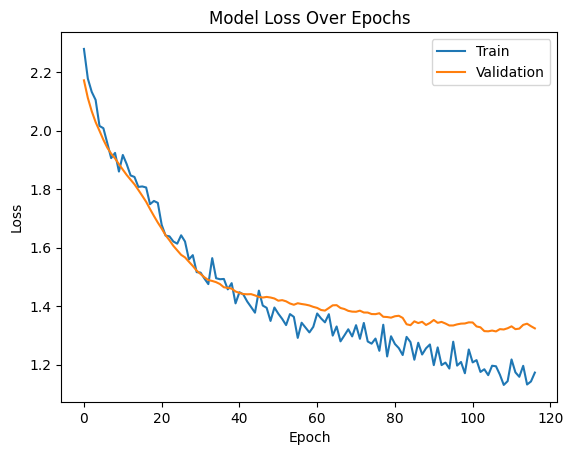

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()